<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BML%5D_%EC%9D%B4%EC%83%81_%ED%83%90%EC%A7%80_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA, 탐색적 데이터 분석

In [5]:
import numpy as np

seed = 1234
np.random.seed(seed)

## 데이터 로드

In [6]:
import pandas as pd

# 데이터 경로 지정 및 읽어오기
data_path = '/content/sampled_creditcard.csv'
credit = pd.read_csv(data_path)

# 데이터 꼴 확인
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


## 기본 분석 및 기초 통계 분석

In [7]:
# 기본 정보
print('#'*20, '기본 정보', '#'*20)
credit.info() # info() 안에서 자동으로 print를 진행

# 기초 통계량
summary_statistics = credit.describe(include='all')
print('#'*20, '기초 통계량', '#'*20)
print(summary_statistics)

#################### 기본 정보 ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19936 entries, 0 to 19935
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19936 non-null  float64
 1   V1      19936 non-null  float64
 2   V2      19936 non-null  float64
 3   V3      19936 non-null  float64
 4   V4      19936 non-null  float64
 5   V5      19936 non-null  float64
 6   V6      19936 non-null  float64
 7   V7      19936 non-null  float64
 8   V8      19936 non-null  float64
 9   V9      19936 non-null  float64
 10  V10     19936 non-null  float64
 11  V11     19936 non-null  float64
 12  V12     19936 non-null  float64
 13  V13     19936 non-null  float64
 14  V14     19936 non-null  float64
 15  V15     19936 non-null  float64
 16  V16     19936 non-null  float64
 17  V17     19936 non-null  float64
 18  V18     19936 non-null  float64
 19  V19     19936 non-null  float64
 20  V20     19936 non-null  

## 범주형 데이터 (Class) 분석

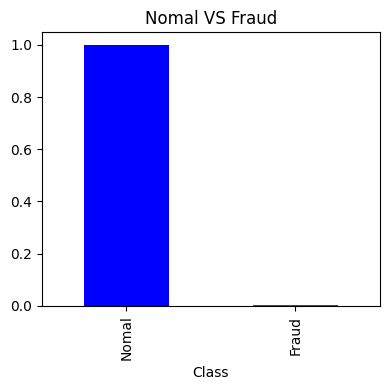

In [8]:
# 이상치 여부 시각화 (Class : 종속변수)
y_columns = ['Class']
y = credit[y_columns]

import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))

y.value_counts(normalize=True).plot(kind='bar', color=['b', 'r'])

plt.xticks(range(2), ['Nomal', 'Fraud'])
plt.title('Nomal VS Fraud')
plt.tight_layout()
plt.show()

굉장히 치우쳐져있음.. Frud 이상치로 탐지할수있을것으로 보임

In [9]:
# 갯수 확인
num_Normal = (y==0).sum().values[0]
num_Fraud = (y==1).sum().values[0]
print(f'Number of Normal data : {num_Normal}')
print(f'Number of Fraud data : {num_Fraud}')

Number of Normal data : 19902
Number of Fraud data : 34


## 수치형 데이터 (시간, 거래 금액) 분석

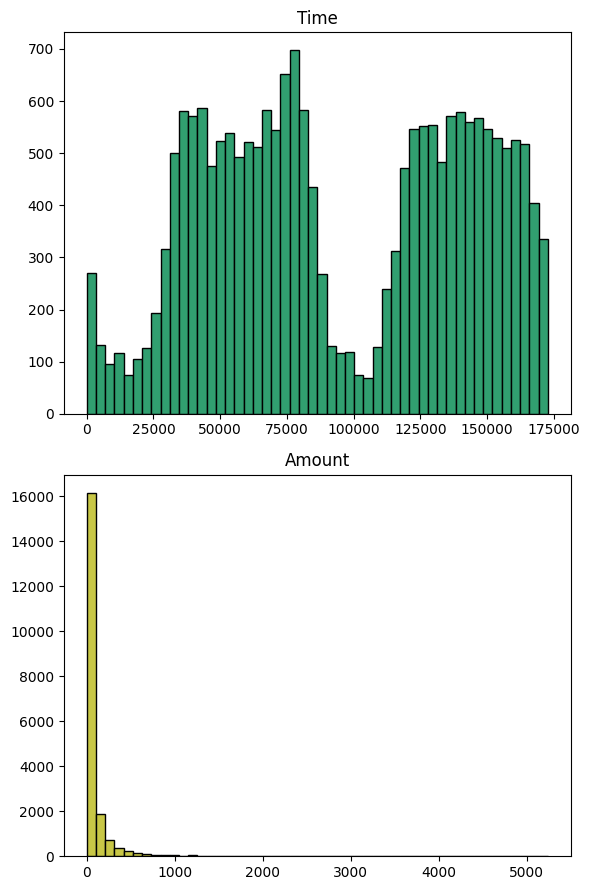

In [10]:
# Time과 Amount 데이터

time_amount_columns = ['Time', 'Amount']
time_amount = credit[time_amount_columns]

# 분포 시각화
plt.figure(figsize=(6, 9))

np.random.seed(seed)
for idx, numeric in enumerate(time_amount_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(2, 1, idx+1)
    plt.hist(time_amount[numeric], bins=50, color=col, edgecolor='black')
    plt.title(numeric)
    plt.tight_layout()

plt.tight_layout()
plt.show()

- 시간: 특이한 분포
- 거래금액: 대부분작은 거래금액을 가지고있음

📌시간\
시간의 경우 거래시작 이후의 경과시간을 나타내므로 시계열 데이터는 보통 주기성을 갖고있음 -> 전처리할수있는과정있음
- 조건: 시작지점이 정해져있어야함
- 이데이터에서는 시작점이 안보임 (전부 다 같은시간에서 쟨것이 아닌듯)
- 만약고객의 거래 시작점을 알게된다면 주기 함수에 대입해봐! sin or cosin

- 이데이터에서는 시간 최소-최대가 갭이 큼 따라서 Min-Max-Scaling 을 사용


📌거래금액\
- 오른쪽으로 굉장히 긴 꼬리
- 꼬리가 길때 전처리과정!!
-> Log 스케일링을 진행

Log 스케일링 진행
- 데이터 분포가 정규 모형으로 변형
- +1 을 해줌 0의값이 있기때문에 Log(0)을 피하기위해!!
- Amount 의 경우 1정도의 크기가 큰문제 되지않음

In [13]:
# Amount에 Log scaling 적용
credit['Log_Amount'] = np.log(credit['Amount'] + 1)
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Log_Amount
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,5.900418
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,6.255980
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,3.465736
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,0.916291
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,0.636577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19931,74452.0,-0.132735,0.447739,0.744547,0.313474,0.597435,0.524248,0.123165,0.225623,0.027503,...,0.217377,-0.158836,-0.960951,-0.320645,0.446059,0.344833,0.138725,12.36,0,2.592265
19932,59437.0,1.094079,-0.430113,1.582344,1.695489,-1.387463,0.318226,-0.953728,0.351027,1.873435,...,-0.168366,-0.036442,0.383068,0.489719,-0.333489,0.088453,0.034017,14.23,0,2.723267
19933,3047.0,1.297943,-0.548409,-0.376310,-0.726768,-0.547925,-0.838753,-0.025775,-0.245579,-1.406757,...,-0.687506,-0.105931,0.051118,0.423645,1.069066,-0.104846,-0.007810,67.46,0,4.226250
19934,112422.0,0.314719,-0.770078,0.585925,-2.574157,-0.959714,-0.321064,-0.388298,0.054306,-1.875053,...,0.188278,0.049033,-0.397831,-0.513511,-0.248877,0.071985,0.033927,45.00,0,3.828641


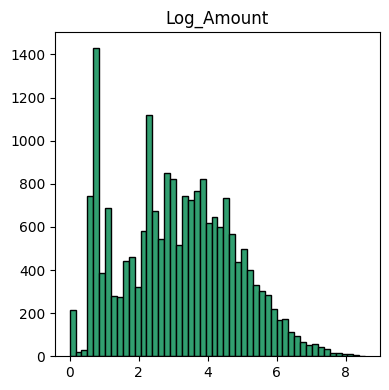

In [14]:
# Time과 Amount 데이터
log_amount_columns = ['Log_Amount']
log_amount = credit[log_amount_columns]

# 분포 시각화
plt.figure(figsize=(4, 4))

np.random.seed(seed)
for idx, numeric in enumerate(log_amount_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.hist(log_amount[numeric], bins=50, color=col, edgecolor='black')
    plt.title(numeric)
    plt.tight_layout()

plt.tight_layout()
plt.show()

PCA 차원축소때문에 의미를 모름 ! -> 일단 분포를 보아 확인

In [15]:
# V1 ~ V28 데이터
Vs_columns = ['V1',  'V2',  'V3',  'V4',  'V5',  'V6',  'V7',  'V8',  'V9',  'V10',
              'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
              'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
Vs_data = credit[Vs_columns]

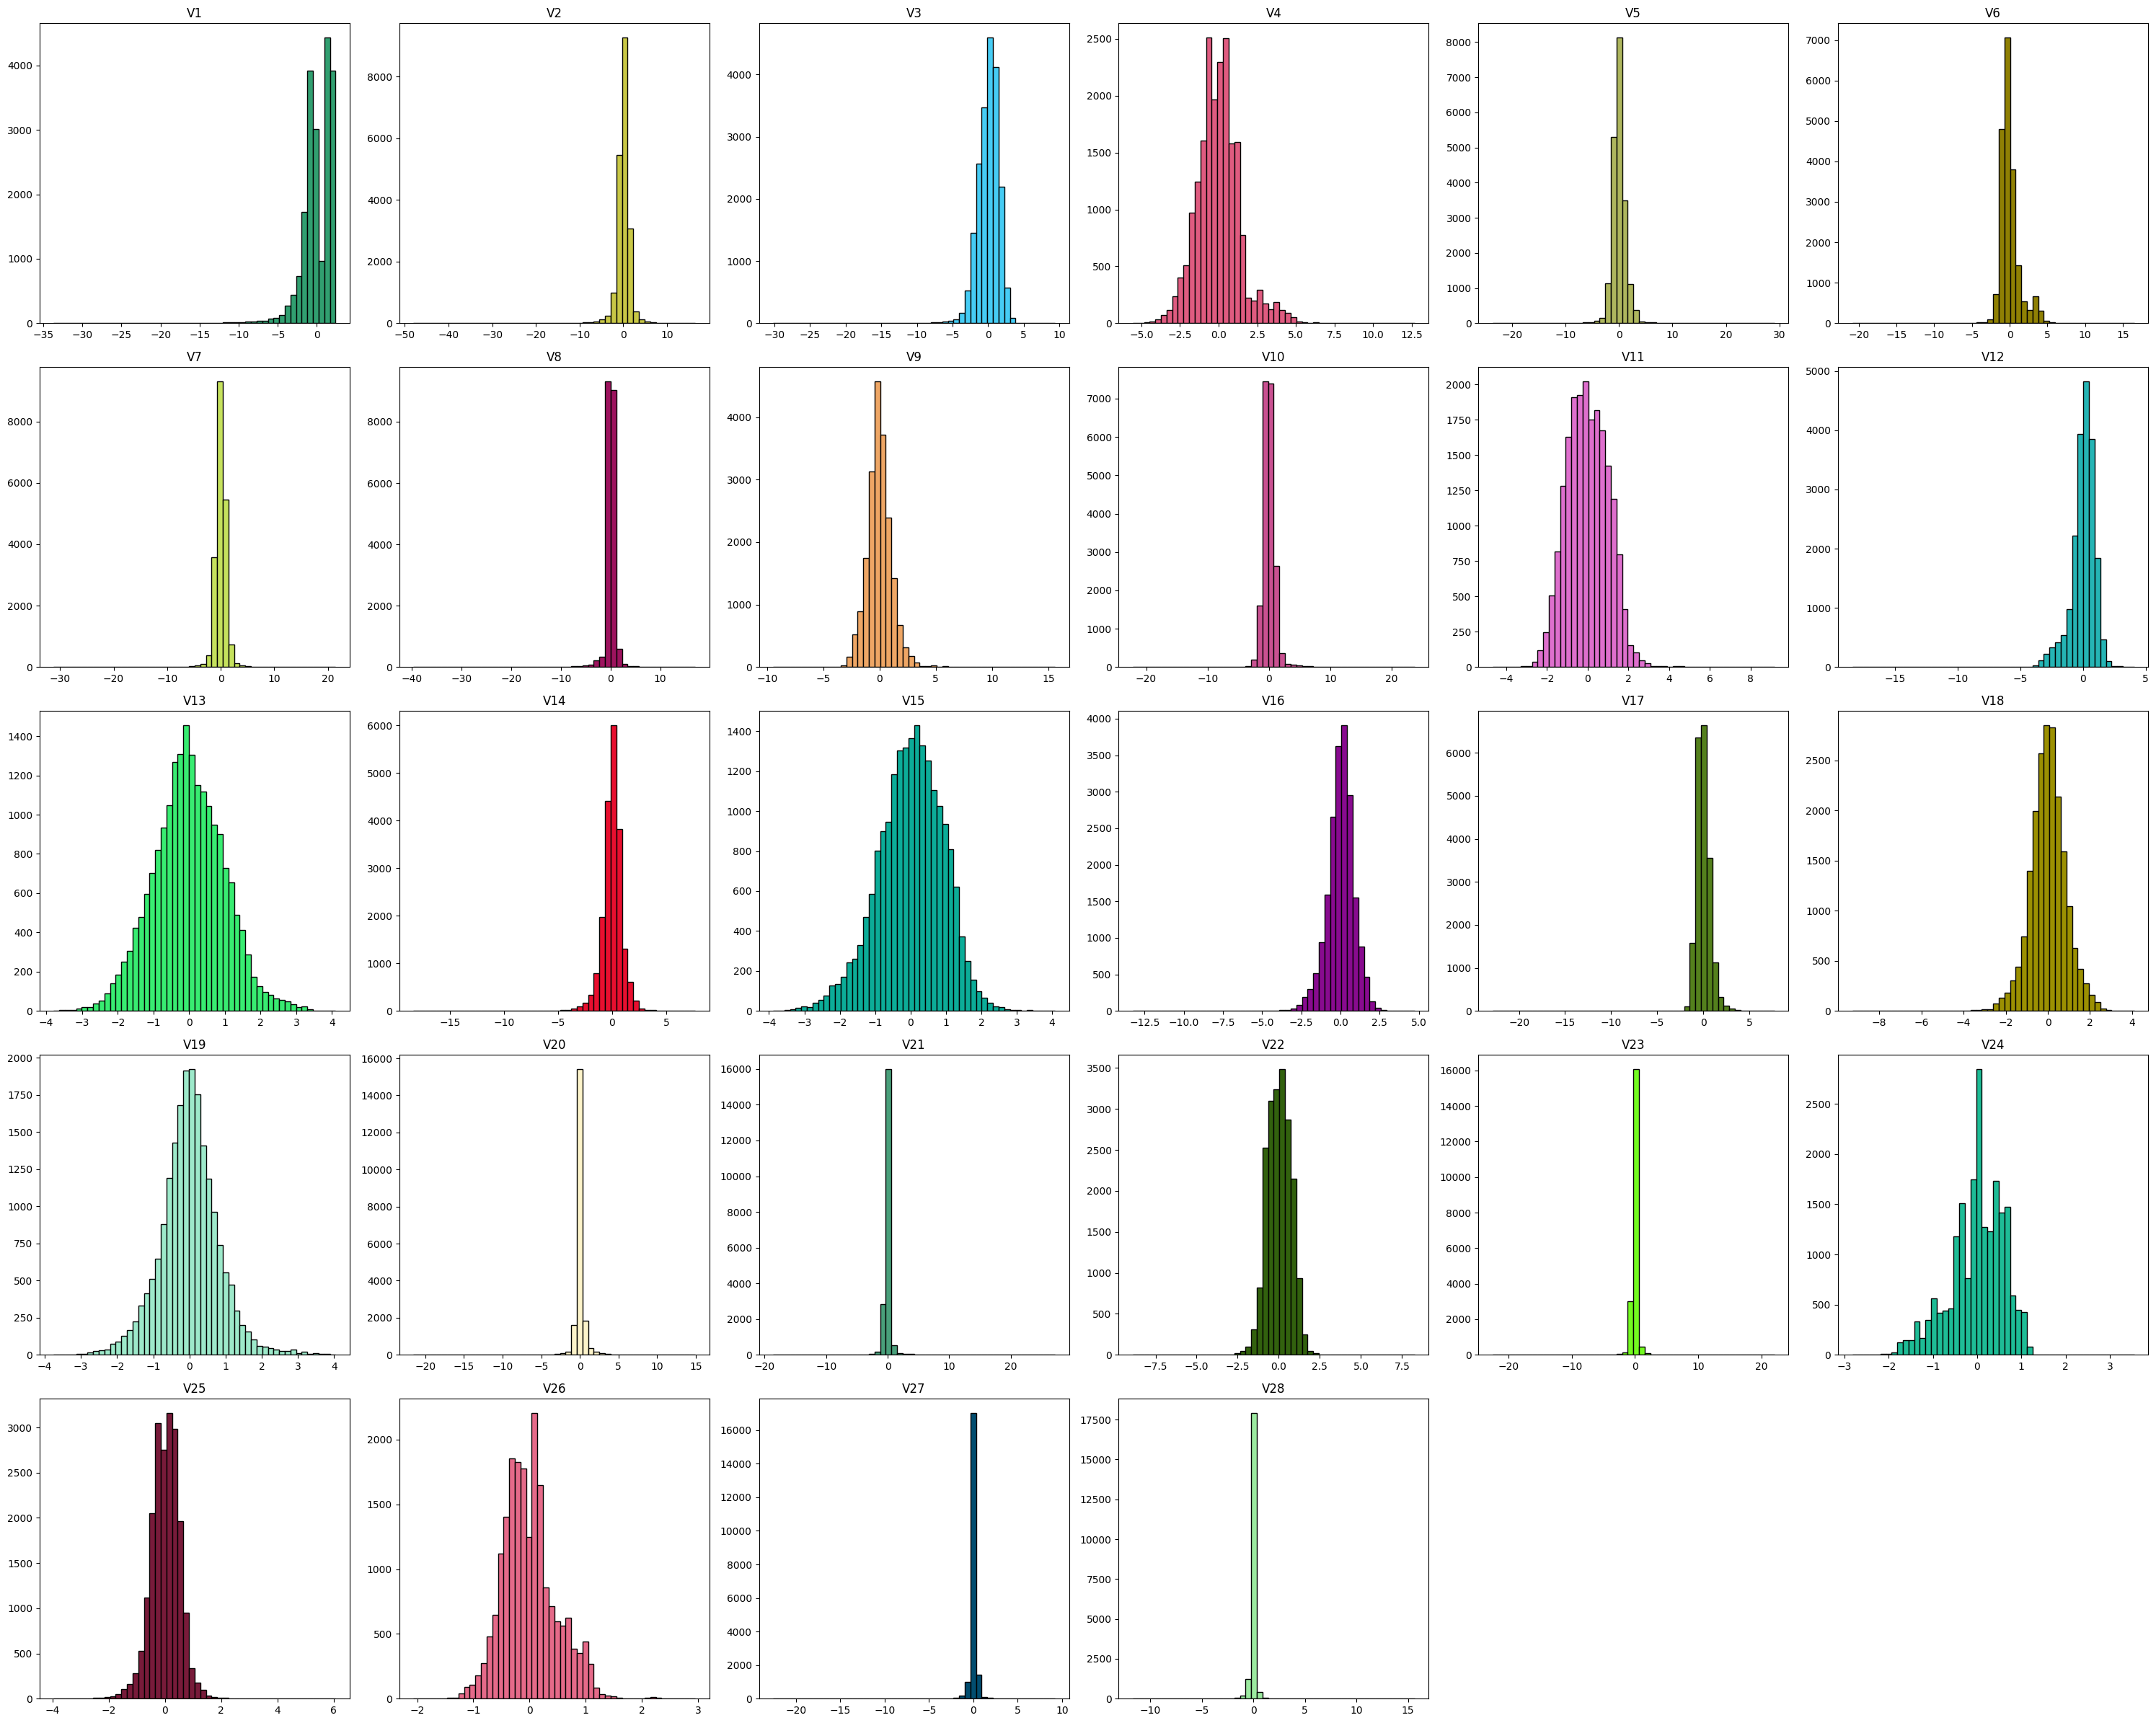

In [16]:
# 분포 시각화
plt.figure(figsize=(30, 24))

np.random.seed(seed)
for idx, numeric in enumerate(Vs_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(5, 6, idx+1)
    plt.hist(Vs_data[numeric], bins=50, color=col, edgecolor='black')
    plt.title(numeric)
    plt.tight_layout()

plt.tight_layout()
plt.show()

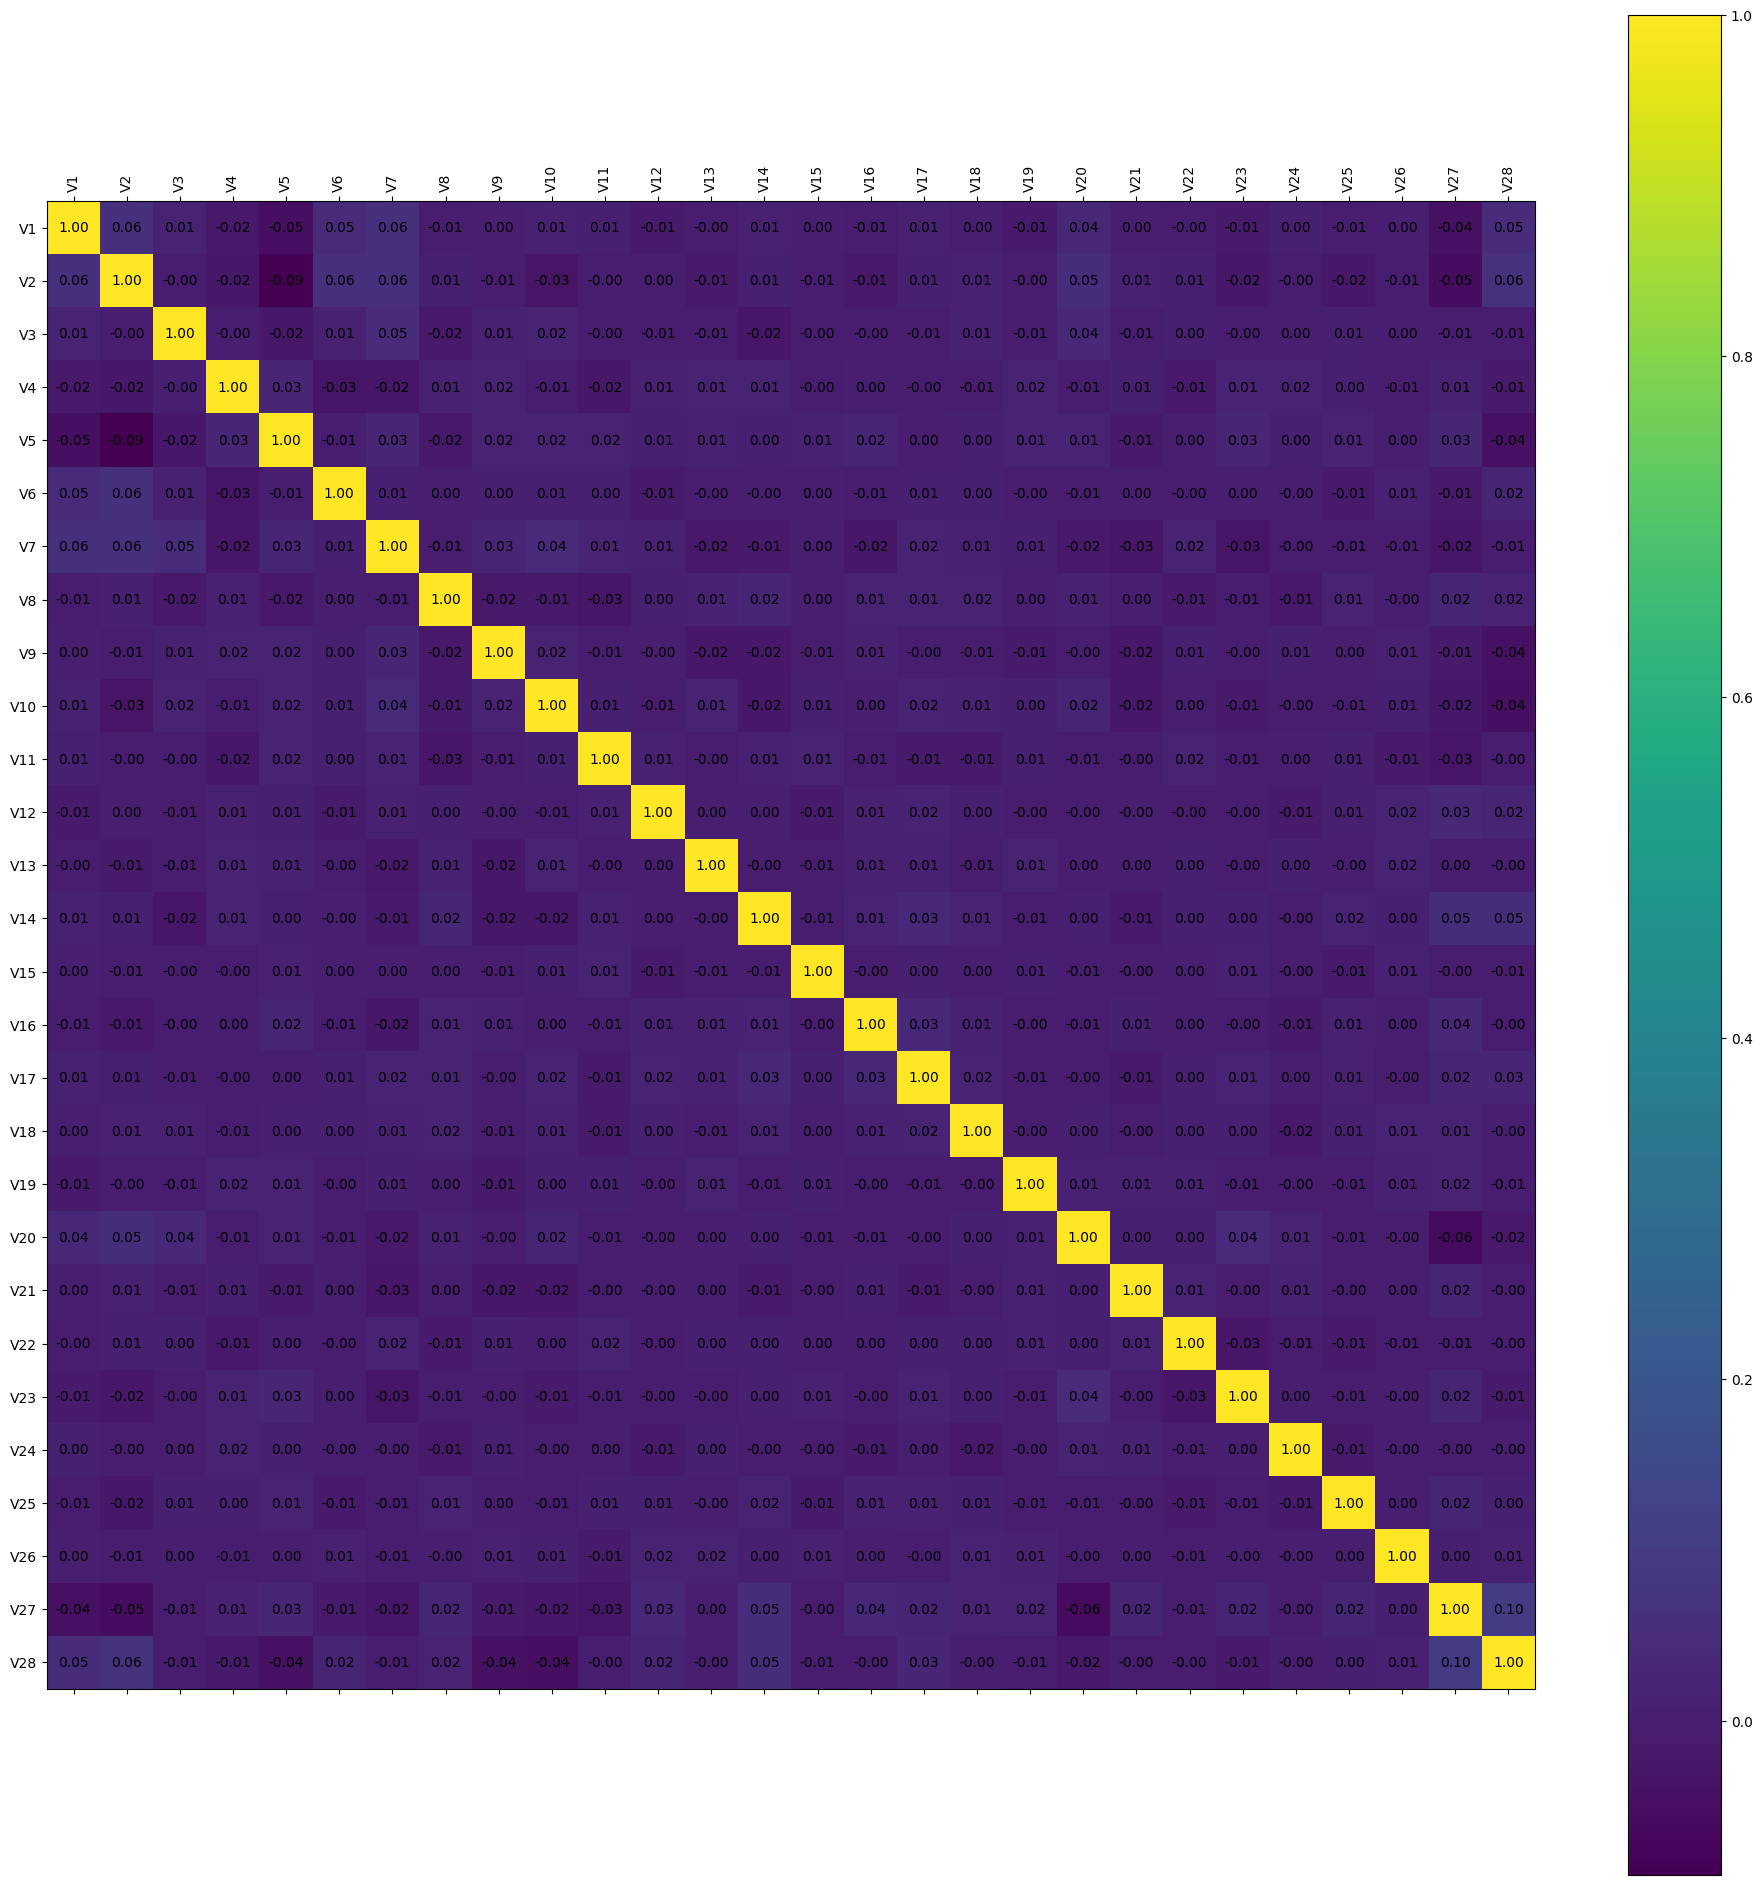

In [17]:
# 상관관계 메트릭스
correlation_matrix = Vs_data.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(24, 24))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

서로 상관성이 큰데이터는 없는것으로 보임 -> PCA 차원축소하면 보통 상관관계가 적음

# 데이터 전처리

## 결측치 제거

In [18]:
# 결측치 값 존재 여부 확인
exist_na = credit.isna().values.any()
exist_null = credit.isnull().values.any()
print(exist_na, exist_null)

False False


## Time 데이터 처리

MINMAX 스케일러

In [19]:
# Time 변수를 Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

credit_time = scaler.fit_transform(credit[['Time']])
credit_time = pd.DataFrame(credit_time)
credit_time.columns = ['Time']
credit_time

,Time
0,0.240216
1,0.256167
2,0.205369
3,0.967248
4,0.975061
...,...
19931,0.430901
19932,0.344000
19933,0.017635
19934,0.650658


In [20]:
# Amount 변수를 Log scale로

credit_log_amount= credit[log_amount_columns]
credit_log_amount

,Log_Amount
0,5.900418
1,6.255980
2,3.465736
3,0.916291
4,0.636577
...,...
19931,2.592265
19932,2.723267
19933,4.226250
19934,3.828641


## 데이터 최종 정리

- Time : Min-Max Scailing  
- Amount : Log Amount 사용
- V1 ~ V28 : 그대로 사용

In [21]:
credit_combined = pd.concat([credit_time,
                             credit_log_amount,
                             Vs_data],
                            axis=1)
credit_combined

,Time,Log_Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.240216,5.900418,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804
1,0.256167,6.255980,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,...,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038
2,0.205369,3.465736,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,...,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634
3,0.967248,0.916291,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,...,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934
4,0.975061,0.636577,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,...,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19931,0.430901,2.592265,-0.132735,0.447739,0.744547,0.313474,0.597435,0.524248,0.123165,0.225623,...,1.665312,0.276111,-0.036089,0.217377,-0.158836,-0.960951,-0.320645,0.446059,0.344833,0.138725
19932,0.344000,2.723267,1.094079,-0.430113,1.582344,1.695489,-1.387463,0.318226,-0.953728,0.351027,...,0.350010,-0.263521,-0.199246,-0.168366,-0.036442,0.383068,0.489719,-0.333489,0.088453,0.034017
19933,0.017635,4.226250,1.297943,-0.548409,-0.376310,-0.726768,-0.547925,-0.838753,-0.025775,-0.245579,...,-0.246209,-0.354826,-0.346650,-0.687506,-0.105931,0.051118,0.423645,1.069066,-0.104846,-0.007810
19934,0.650658,3.828641,0.314719,-0.770078,0.585925,-2.574157,-0.959714,-0.321064,-0.388298,0.054306,...,0.026757,-0.389051,-0.047975,0.188278,0.049033,-0.397831,-0.513511,-0.248877,0.071985,0.033927


# 모델 구축 및 결과 확인

Isolation Forest

## 학습 진행

In [23]:
n_estimators = 100
max_samples = 'auto'
# contamination = 'auto'
contamination = num_Fraud/(num_Normal+num_Fraud) #비율을 알수가있는 데이터임

# Isolation Forest 생성 및 학습
from sklearn.ensemble import IsolationForest
IForest = IsolationForest(n_estimators=n_estimators,
                          max_samples=max_samples,
                          contamination=contamination,
                          random_state=seed)
IForest.fit(credit_combined)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0017054574638844303, random_state=1234)

## 학습 모델 평가 진행

In [24]:
y_true = credit['Class']

y_pred = IForest.predict(credit_combined)
y_pred = np.where(y_pred == 1, 0, 1)

In [25]:
# 성능 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'정확도 Accuracy : {accuracy*100:.2f} %')
print(f'정밀도 Precision : {precision*100:.2f} %')
print(f'재현율 Recall : {recall*100:.2f} %')
print(f'F1 : {f1*100:.2f} %')

정확도 Accuracy : 99.77 %
정밀도 Precision : 32.35 %
재현율 Recall : 32.35 %
F1 : 32.35 %


- 이상치 데이터는 전체 데이터에서 극 소수이므로 정밀도, 재현율, F1 값이 그렇게 좋지는 앞음 ... Confusion Matrix 통해 확인

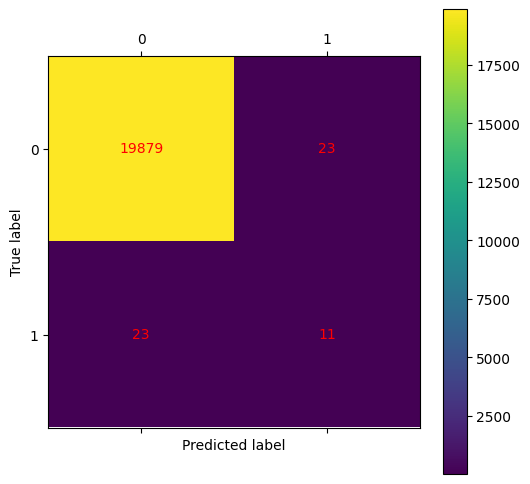

In [26]:
from sklearn.metrics import confusion_matrix

result_cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))

plt.matshow(result_cm, fignum=1)
plt.xticks(range(2), [0, 1])
plt.yticks(range(2), [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()

for (i, j), val in np.ndenumerate(result_cm):
    plt.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.show()